In [1]:
# Read data
import pandas as pd
data=pd.read_csv('../data/data.csv')
data=data[data.birth_date.str.len()==10] #Removing incomplete dates

C:\Users\Ojas\AppData\Local\Temp\ipykernel_19792\1725432702.py:3: DtypeWarning: Columns (18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('../data/data.csv')


In [2]:
# Get the day of week for each date
data['birth_date']=pd.to_datetime(data.birth_date, errors='coerce')
data['Day of birth']=data.birth_date.dt.day_name()
data

,Unnamed: 0,gender,id,identifiers,image,images,name,birth_date,links,other_names,...,family_name,death_date,email,sort_name,honorific_prefix,honorific_suffix,national_identity,summary,patronymic_name,Day of birth
8,8,male,34352d83-6fa1-463d-a02f-6157b3adf36b,"[{'identifier': '141', 'scheme': 'everypolitic...",http://www.parlamentra.org/upload/iblock/bfe/u...,[{'url': 'http://www.parlamentra.org/upload/ib...,Убирия Бежан Михайлович,1967-03-07,"[{'note': 'Wikipedia (ru)', 'url': 'https://ru...","[{'name': 'Бежан Убириа', 'note': 'alternate'}...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
19,19,male,9fd33b27-fd4c-4eba-9a8f-d4d23f603c63,"[{'identifier': '/m/03fqqs', 'scheme': 'freeba...",http://www.parlamentra.org/upload/iblock/e1f/s...,[{'url': 'http://www.parlamentra.org/upload/ib...,Шамба Сергей Миронович,1951-03-15,"[{'note': 'Wikipedia (ab)', 'url': 'https://ab...","[{'lang': 'ab', 'name': 'Сергеи Шамба', 'note'...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
28,28,male,da988bab-32d4-46c0-bb7b-5c6a6eb129e7,"[{'identifier': '46', 'scheme': 'everypolitici...",http://www.parlamentra.org/upload/iblock/b85/%...,[{'url': 'http://www.parlamentra.org/upload/ib...,Бганба Валерий Рамшухович,1953-08-26,"[{'note': 'Wikimedia Commons', 'url': 'https:/...","[{'lang': 'cs', 'name': 'Valerij Bganba', 'not...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
113,78,female,522dff9d-d21d-41b9-a7d5-c2321c819b11,"[{'identifier': '1854', 'scheme': 'everypoliti...",http://www.wolesi.website/Media/Images/mine/fa...,[{'url': 'http://www.wolesi.website/Media/Imag...,Farkhunda Zahra Naderi-Kabul,1981-04-19,"[{'note': 'Wikimedia Commons', 'url': 'https:/...","[{'lang': 'en', 'name': 'Farkhunda Zahra Nader...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday
207,172,female,aac6f415-446d-4070-80d9-195d4f7b77ac,"[{'identifier': '1823', 'scheme': 'everypoliti...",http://www.wolesi.website/Media/Images/mine/ra...,[{'url': 'http://www.wolesi.website/Media/Imag...,Rangina Kargar-Faryab,1985-03-22,"[{'note': 'Wikimedia Commons', 'url': 'https:/...","[{'lang': 'en', 'name': 'Rangina Kargar', 'not...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78373,51,female,e57828f1-e51a-41ea-a61b-7fc1b92e2b37,"[{'identifier': '109', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/dahl_ulla_britt.jpg,[{'url': 'http://www.lagtinget.ax/files/dahl_u...,Dahl Ulla-Britt,1946-03-14,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...","[{'lang': 'en', 'name': 'Ulla-Britt Dahl', 'no...",...,Dahl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
78374,52,male,e6f6e01b-bcb0-4374-8912-7e1eaf492f10,"[{'identifier': '97', 'scheme': 'everypolitici...",http://www.lagtinget.ax/files/lindfors_henry.jpg,[{'url': 'http://www.lagtinget.ax/files/lindfo...,Lindström Henry,1956-06-20,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...","[{'lang': 'en', 'name': 'Henry Lindström', 'no...",...,Lindström,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wednesday
78377,55,male,ed4838aa-19f8-493c-b8c4-58780b5b0d84,"[{'identifier': '112', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/sjolund_folke.jpg,[{'url': 'http://www.lagtinget.ax/files/sjolun...,Sjölund Folke,1943-12-16,"[{'note': 'Wikipedia (fi)', 'url': 'https://fi...","[{'lang': 'en', 'name': 'Folke Sjölund', 'note...",...,Sjölund,2013-12-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thursday
78379,57,male,f4f995ae-126c-468f-8f26-deec1e26adc2,"[{'identifier': '372', 'scheme': 'everypolitic...",http://www.lagtinget.ax/files/asumaa_tony.jpg,[{'url': 'http://www.lagtinget.ax/files/asumaa...,Asumaa Tony,1968-09-15,"[{'note': 'Wikipedia (en)', 'url': 'https://en...","[{'lang': 'en', 'name': 'Tony Asumaa', 'note':...",...,Asumaa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sunday


In [3]:
# Get counts of each day
daily=data.groupby('Day of birth').count()[['name']]
daily

,name
Day of birth,
Friday,6383
Monday,6451
Saturday,6167
Sunday,6095
Thursday,6273
Tuesday,6276
Wednesday,6328


In [4]:
# Add percentage & prepare for plotting
daily['percentage']=daily.name/daily.name.sum()*100
daily['percentage']=daily['percentage'].round(2)
daily=daily.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
daily.index=pd.CategoricalIndex(daily.index, categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered=True)

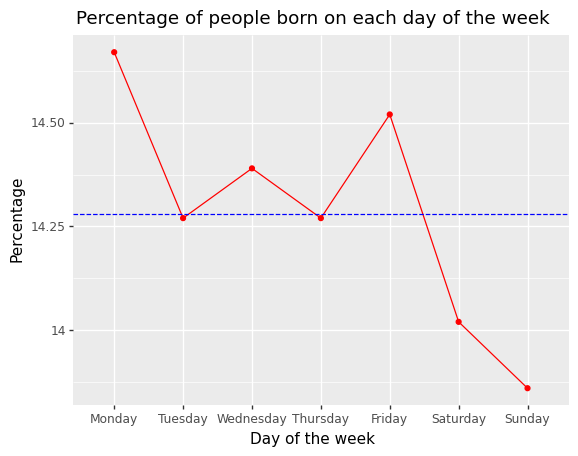

<ggplot: (146673582680)>

In [5]:
# Plot
from plotnine import *
ggplot(daily, aes(x=daily.index, y='percentage', group=1))\
    +geom_line(aes(y='percentage'), color='red')\
    +geom_point(aes(y='percentage'), color='red')\
    +geom_hline(yintercept=14.28, linetype='dashed', color='blue')\
    +labs(title='Percentage of people born on each day of the week', x='Day of the week', y='Percentage')